In [9]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

In [10]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [11]:
# Importing important libraries for EDA
import numpy as np
import seaborn as sns

#plt.style.use('ggplot')
sns.set_style('whitegrid')

from IPython.display import display
%matplotlib inline

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

rand = 7

In [12]:
# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [13]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")
passenger_ids = test_data["PassengerId"]

display(train_data.sample(n = 3))
display(test_data.sample(n = 3))
display(passenger_ids.sample(n = 3))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
129,1021,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,NaN,S
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C


40      932
313    1205
275    1167
Name: PassengerId, dtype: int64

1. 타이타닉
2. 예측치
   => 승객의 나이, 성별, 승객 등급, 승선 위치   속성을 기반으로 하여
   => 승객의 생존 여부를 예측하는 것이 목표

* 결측값 없는 항목 :
    -> 티켓등급(Pclass),
    -> 티켓번호(Ticket),
    -> 이름(Name),
    -> 성별(Sex),
    -> 동반한 형제자매/배우자 수(Sibsp),
    -> 동반한 부모/자식 수(Parch),
    -> 요금(Fare)

* 결측값 있는 항목 :
    -> 나이(Age),
    -> 승선지역(Embarked),
    -> 객실(Cabin)
    


We get the following observations after looking at the data :

Continious Features
1.Age
2.Fare

skeweness(왜도) : 자료의 분포가 중앙으로부터 좌우로 치우친 정도를 나타내는 척도

We need to check for any skeweness(왜도) in these continious feature distributions and scale/ bin them so that they may work well with models that use distances.

## Categorical Feature/ Nominal Features
1.Sex
2.Embarked

We would need to hot encode them.

## Ordinal/ Interval Features
1.Pclass
2.SibSp
3.Parch

## Alphanumeric
1.Name
2.Cabin

## The following columns have null values and need to be dropped or interpolated(보간하다) :
1.Age (Both in training and testing data)
2.Cabin (Both)
3.Embarked (Training data)
4.Fare (Testing data)

## The following are features we need to transform to get any information out of or need to drop them.
1.Name
2.Cabin
3.Ticket

In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


0    549
1    342
Name: Survived, dtype: int64

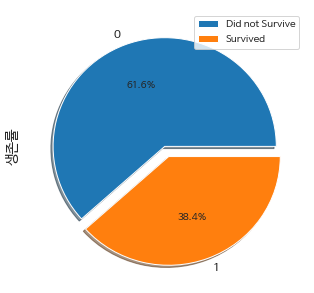

In [16]:
display(train_data["Survived"].value_counts())

train_data['Survived'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (5, 5), autopct = '%1.1f%%', shadow = True)
plt.ylabel("생존률")
plt.legend(["Did not Survive", "Survived"])
plt.show()


3    491
1    216
2    184
Name: Pclass, dtype: int64

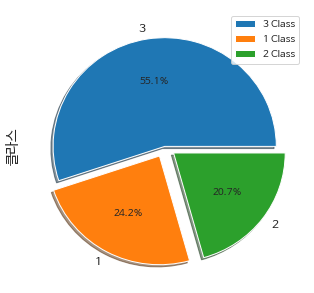

In [17]:
display(train_data["Pclass"].value_counts())

train_data['Pclass'].value_counts().plot(kind = 'pie', explode = [0, 0.1, 0.1], figsize = (5, 5), autopct = '%1.1f%%', shadow = True)
plt.ylabel("클라스")
plt.legend(["3 Class", "1 Class", "2 Class"])
plt.show()


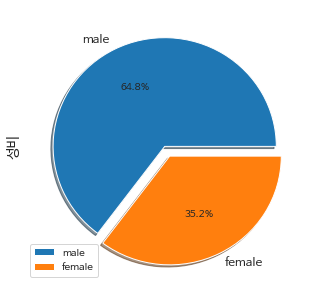

In [18]:
train_data["Sex"].value_counts()

train_data['Sex'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (5, 5), autopct = '%1.1f%%', shadow = True)
plt.ylabel("성비")
plt.legend(["male", "female"])
plt.show()

In [19]:
train_data["Cabin"].value_counts().head()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
Name: Cabin, dtype: int64

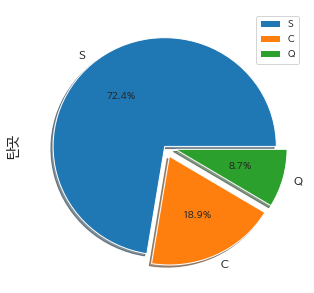

In [20]:
train_data["Embarked"].value_counts()

train_data['Embarked'].value_counts().plot(kind = 'pie', explode = [0, 0.1, 0.1], figsize = (5, 5), autopct = '%1.1f%%', shadow = True)
plt.ylabel("탄곳")
plt.legend(["S", "C", "Q"])




Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

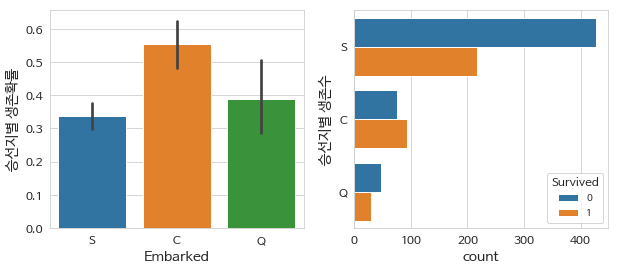

In [21]:

survival_by_port = train_data.groupby("Embarked")["Survived"].mean()
display(survival_by_port)

f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.barplot(x = "Embarked", y = "Survived", data = train_data, ax = ax[0])
ax[0].set_ylabel("승선지별 생존확률")

sns.countplot(y = "Embarked", hue = "Survived", data = train_data, ax = ax[1])
ax[1].set_ylabel("승선지별 생존수")

plt.show()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

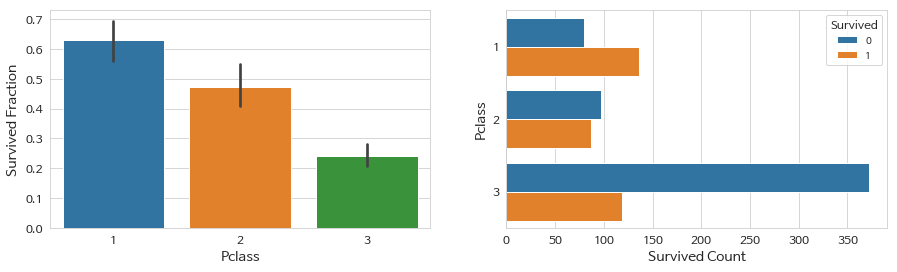

In [22]:
survival_by_class = train_data.groupby("Pclass")["Survived"].mean()
display(survival_by_class)

f, ax = plt.subplots(1, 2, figsize = (15, 4))


sns.barplot(x = "Pclass", y = "Survived", data = train_data, ax = ax[0])
ax[0].set_ylabel("Survived Fraction")

sns.countplot(y = 'Pclass', hue='Survived', data = train_data, ax = ax[1])
ax[1].set_xlabel("Survived Count")
ax[1].set_ylabel("Pclass")

plt.show()

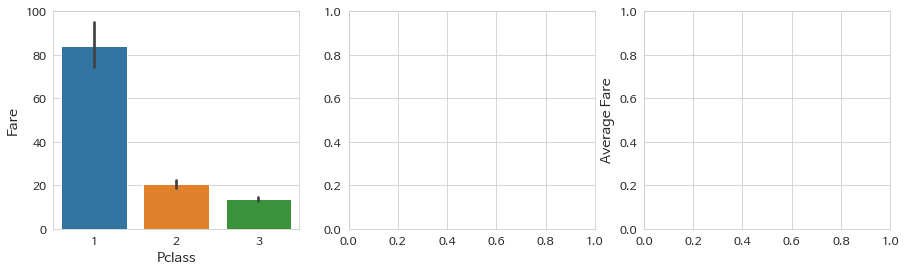

In [23]:
f, ax = plt.subplots(1, 3, figsize = (15, 4))

sns.barplot(x = "Pclass", y = "Fare", data = train_data, ax = ax[0])
plt.ylabel("Average Fare")


plt.show()

In [24]:
pd.crosstab([train_data["Sex"], train_data["Survived"]], train_data["Pclass"], margins = True).style.background_gradient(cmap = 'summer_r')

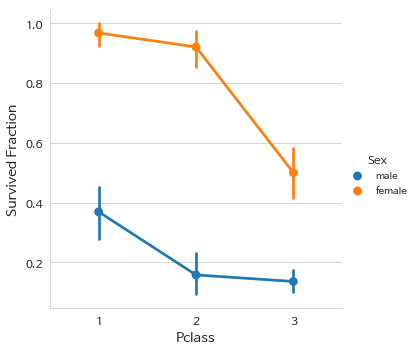

In [25]:
sns.factorplot(x = "Pclass", y = "Survived", hue = "Sex", data = train_data)
plt.ylabel("Survived Fraction")
plt.show()

In [26]:
pd.crosstab([train_data["Pclass"], train_data["Survived"]],train_data["Embarked"], margins = True).style.background_gradient(cmap = 'summer_r')


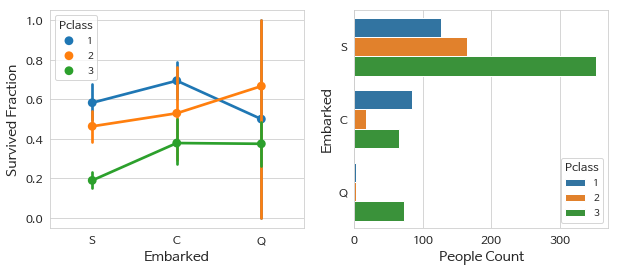

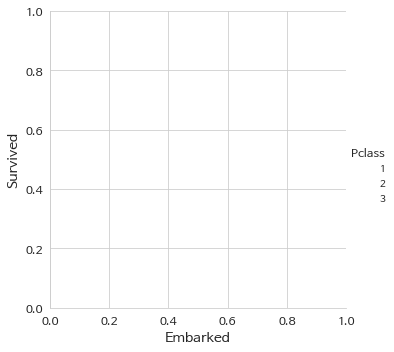

In [27]:
f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.factorplot(x = "Embarked", y = "Survived", hue = "Pclass", data = train_data, ax = ax[0])
ax[0].set_ylabel("Survived Fraction")

sns.countplot(y = "Embarked", hue = "Pclass", data = train_data, ax = ax[1])
ax[1].set_xlabel("People Count")

plt.show()

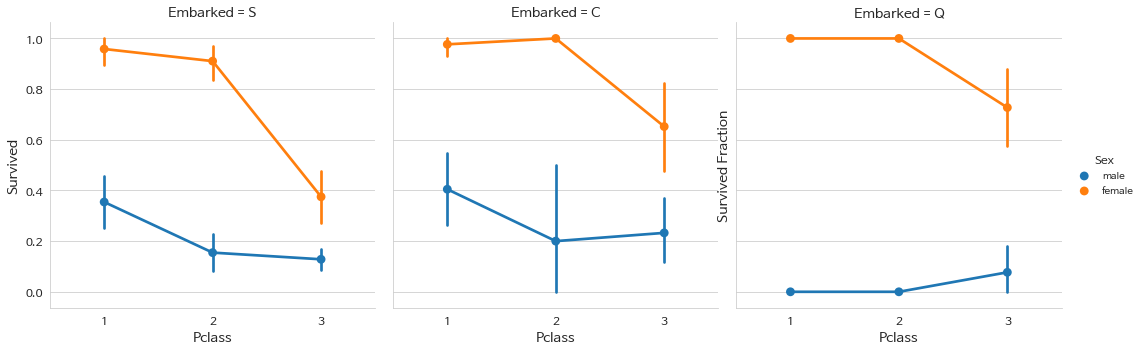

In [28]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = train_data)
plt.ylabel("Survived Fraction")

plt.show()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


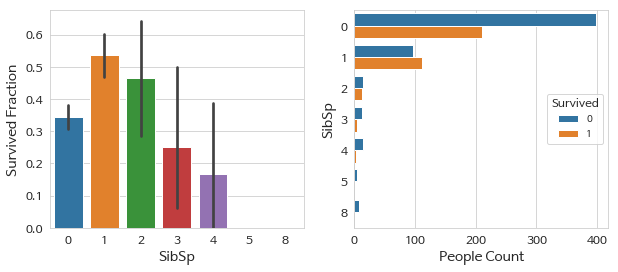

In [29]:
print(train_data.groupby("SibSp")["Survived"].mean())

f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.barplot(x = "SibSp", y = "Survived", data = train_data, ax = ax[0])
ax[0].set_ylabel("Survived Fraction")

sns.countplot(y = "SibSp", hue = "Survived", data = train_data, ax = ax[1])
ax[1].set_xlabel("People Count")

plt.show()


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


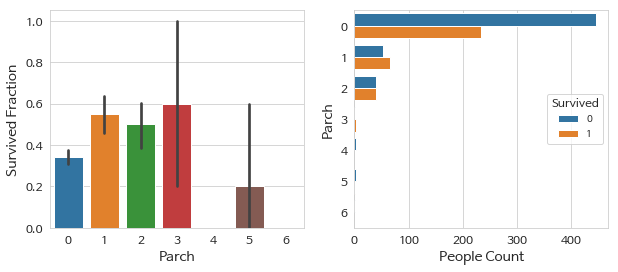

In [30]:
print(train_data.groupby("Parch")["Survived"].mean())

f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.barplot(x = "Parch", y = "Survived", data = train_data, ax = ax[0])
ax[0].set_ylabel("Survived Fraction")

sns.countplot(y = "Parch", hue = "Survived", data = train_data, ax = ax[1])
ax[1].set_xlabel("People Count")

plt.show()

In [31]:
# PR #9151에서 가져온 CategoricalEncoder 클래스의 정의.
# 이 클래스는 사이킷런 0.20에 포함될 예정입니다.
# 이 셀을 실행하거나 복사해서 사용하세요. 이 코드를 모두 이해할 필요는 없습니다.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
import numpy as np

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", Imputer(strategy="median")),
    ])

In [34]:
# stackoverflow.com/questions/25239958 에서 착안했습니다
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        print("data type", type(X))
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [35]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", CategoricalEncoder(encoding='onehot-dense')),
    ])

In [36]:
from future_encoders import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [37]:
cat_pipeline.fit_transform(train_data)

data type <class 'pandas.core.frame.DataFrame'>


array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [38]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [39]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

data type <class 'pandas.core.frame.DataFrame'>


array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [40]:
y_train = train_data["Survived"]
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)
X_test

array([[34.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       [62. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [28. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [28. ,  1. ,  1. , ...,  1. ,  0. ,  0. ]])

In [43]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7365250822835092

# => 80%의 정확도를 내는 모델을 적용해보겠당

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8115690614005221

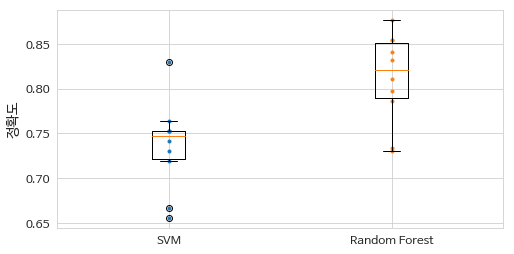

In [46]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("정확도", fontsize=14)
plt.show()

이 결과를 더 향상시키려면:

* 교차 검증과 그리드 탐색을 사용하여 더 많은 모델을 비교하고 하이퍼파라미터를 튜닝한다.

* 특성 공학을 더 시도해 본다. 예를 들면: -> SibSp와 Parch을 이 두 특성의 합으로 바꿉니다. -> Survived 특성과 관련된 이름을 구별해 보세요(가령, 이름에 "Countess"가 있는 경우 생존할 가능성이 높습니다).

* 수치 특성을 범주형 특성으로 바꾸어 보세요: 예를 들어, -> 나이대가 다른 경우 다른 생존 비율을 가질 수 있습니다(아래 참조). -> 그러므로 나이 구간을 범주로 만들어 나이 대신 사용하는 것이 도움이 될 수 있스니다. -> 비슷하게 생존자의 30%가 혼자 여행하는 사람이기 때문에 이들을 위한 특별한 범주를 만드는 것이 도움이 될 수 있습니다(아래 참조).

In [47]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [48]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,45.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,15.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0


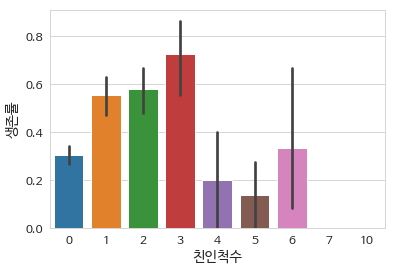

In [49]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()


sns.barplot(x = "RelativesOnboard",y = "Survived",  data = train_data)
plt.xlabel("친인척수")
plt.ylabel("생존률")


plt.show()

# Data Cleaning and Feature Engineering
Lets do a little bit of feature engg and study the affects of these features on the survival rate This step is heavily taken from

-> 'Sina'(https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier) and -> 'Ash' (https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

In [50]:
import math

# Has a cabin ?

def hasCabin(x):
    return int((x["Cabin"] is not np.nan))

train_data["HasCabin"] = train_data.apply(hasCabin, axis = 1)
test_data["HasCabin"] = test_data.apply(hasCabin, axis = 1)

# Combine SibSp & Parch to create a new variable FamilySize
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1


# Use family size to create a new feature isAlone.
def isAlone(x):
    familySize = x["FamilySize"]
    return int(familySize == 1)

train_data["IsAlone"] = train_data.apply(isAlone, axis = 1)
test_data["IsAlone"] = test_data.apply(isAlone, axis = 1)

display(train_data.sample(n = 3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,45.0,0,1,1,1
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S,15.0,0,0,1,1
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S,15.0,0,0,1,1


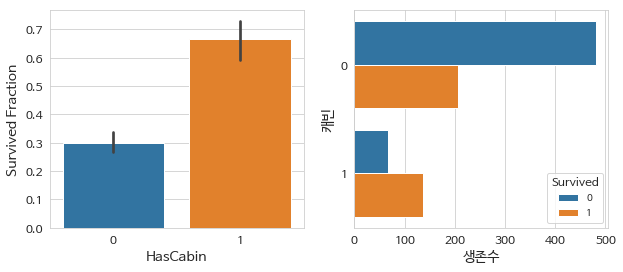

In [51]:
f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.barplot(x = "HasCabin", y = "Survived", data = train_data, ax = ax[0])
ax[0].set_ylabel("Survived Fraction")
plt.xlabel("룸빌림")
plt.ylabel("생존률")


sns.countplot(y = "HasCabin", hue = "Survived", data = train_data, ax = ax[1])
ax[1].set_ylabel("People Count")
plt.xlabel("생존수")
plt.ylabel("캐빈")

plt.show()


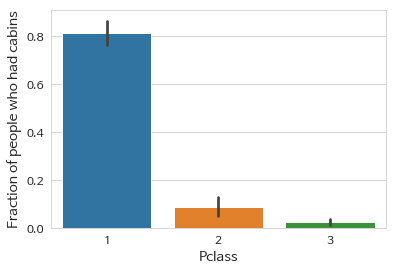

In [52]:
sns.barplot(x = "Pclass", y = "HasCabin", data = train_data)
plt.ylabel("Fraction of people who had cabins")
plt.show()


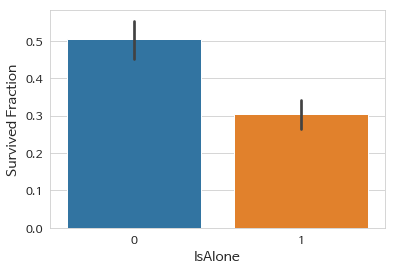

In [53]:
sns.barplot(x = "IsAlone", y = "Survived", data = train_data)
plt.ylabel("Survived Fraction")
plt.show()

# People who are alone are less likely to survive. This may go on to be a useful feature.

In [54]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""    
    
train_data["Title"] = train_data["Name"].apply(get_title)
test_data["Title"] = test_data["Name"].apply(get_title)

train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')


In [55]:

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15.0,1,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0,1,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15.0,0,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0,1,1,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0,0,0,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0,0,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,45.0,0,1,1,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0,4,0,5,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,15.0,2,0,3,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0,1,0,2,0,Mrs


In [56]:
train_data["Name"].apply(get_title).value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Jonkheer      1
Capt          1
Mme           1
Sir           1
Lady          1
Don           1
Countess      1
Name: Name, dtype: int64

In [57]:
display(train_data.sample(n = 3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Title
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,45.0,4,0,5,0,Mrs
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S,30.0,1,0,2,0,Mr
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,NaN,0,0,1,1,Mr


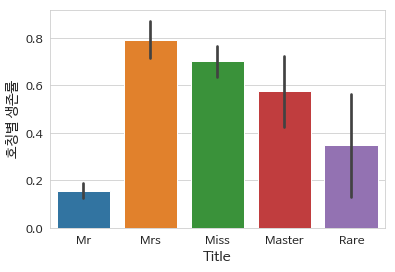

In [58]:
sns.barplot(x = "Title", y = "Survived", data = train_data)
plt.ylabel("호칭별 생존률")
plt.show()

In [59]:
# 중간 나이로 모두 채운다

train_data["Age"] = train_data.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean()))
test_data["Age"] = test_data.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean()))
#display(train_data.sample(n = 3))
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,15.0,1,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30.0,1,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,15.0,0,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30.0,1,1,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,30.0,0,0,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,NaN,Q,NaN,0,0,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,45.0,0,1,1,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0.0,4,0,5,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,15.0,2,0,3,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,0.0,1,0,2,0,Mrs


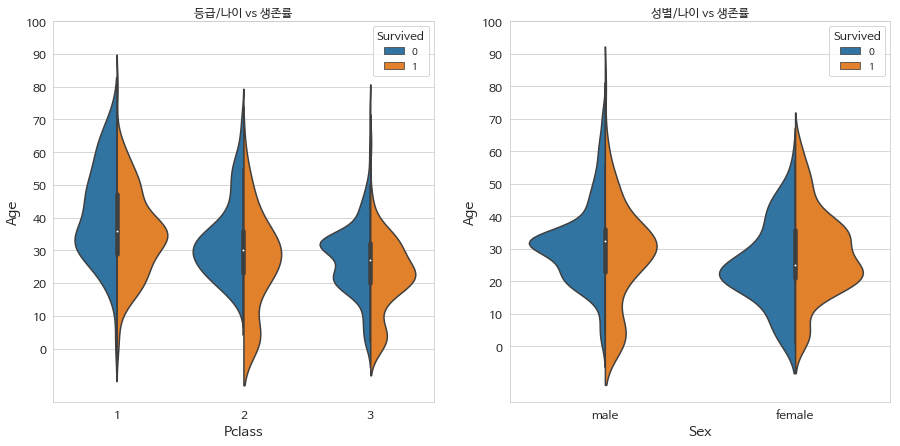

In [60]:
f,ax=plt.subplots(1,2,figsize=(15, 7))

sns.violinplot("Pclass", "Age", hue = "Survived", data = train_data, split = True, ax=ax[0])
ax[0].set_title('등급/나이 vs 생존률')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue="Survived", data = train_data, split=True, ax=ax[1])
ax[1].set_title('성별/나이 vs 생존률')
ax[1].set_yticks(range(0,110,10))
plt.show()

From the above graphs we can see that

children had a higher rate of survival, irrespective of Class and Gender. In general women had a higher survival rate.

Also for men, as the age increases, the survival rate decreases.

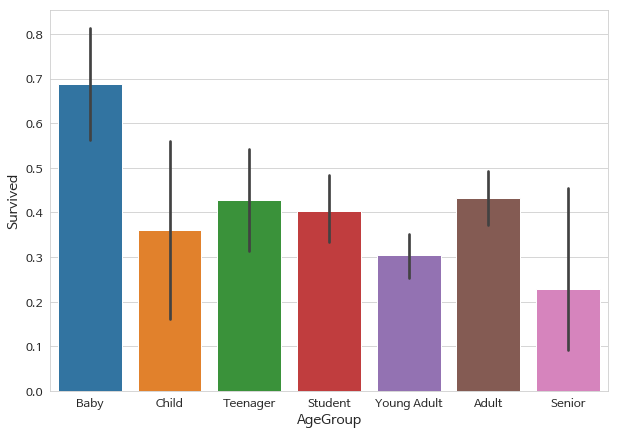

In [61]:
# Babies are more likely to survive than any other group.

f,ax=plt.subplots(1,1,figsize=(10, 7))
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

sns.barplot(x = "AgeGroup", y = "Survived", data = train_data)

In [62]:
train_data[train_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Title,AgeGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,30.0,0,1,1,1,Miss,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,60.0,0,1,1,1,Mrs,Senior


In [63]:
# Since the ticket is first class and the persons survived, lets fill it with C
train_data["Embarked"] = train_data["Embarked"].fillna("C")

In [64]:
test_data["Fare"] = test_data.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))

pd.qcut(train_data['Fare'], 4).head()
# qcut 명령은 구간 경계선을 지정하지 않고 데이터 갯수가 같도록 지정한 수의 구간으로 나눈다. 
# 예를 들어 다음 코드는 1000개의 데이터를 4개의 구간으로 나누는데 각 구간은 250개씩의 데이터를 가진다.

0     (-0.001, 7.91]
1    (31.0, 512.329]
2     (7.91, 14.454]
3    (31.0, 512.329]
4     (7.91, 14.454]
Name: Fare, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [65]:
train_data['FareRange'] = pd.qcut(train_data['Fare'], 4)

train_data['Farecat'] = 0
train_data.loc[train_data['Fare'] <= 7.91,'Farecat'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare']<=14.454),'Farecat'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare']<=31),'Farecat'] = 2
train_data.loc[(train_data['Fare'] > 31) & (train_data['Fare']<=513),'Farecat'] = 3


test_data['FareRange'] = pd.qcut(test_data['Fare'], 4)

test_data['Farecat'] = 0
test_data.loc[test_data['Fare'] <= 7.91,'Farecat'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare']<=14.454),'Farecat'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare']<=31),'Farecat'] = 2
test_data.loc[(test_data['Fare'] > 31) & (test_data['Fare']<=513),'Farecat'] = 3

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Title,AgeGroup,FareRange,Farecat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,S,15.0,1,0,2,0,Mr,Student,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,C,30.0,1,1,2,0,Mrs,Adult,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,15.0,0,0,1,1,Miss,Young Adult,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,S,30.0,1,1,2,0,Mrs,Young Adult,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,S,30.0,0,0,1,1,Mr,Young Adult,"(7.91, 14.454]",1
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,...,Q,NaN,0,0,1,1,Mr,Young Adult,"(7.91, 14.454]",1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,...,S,45.0,0,1,1,1,Mr,Adult,"(31.0, 512.329]",3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,...,S,0.0,4,0,5,0,Master,Baby,"(14.454, 31.0]",2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,...,S,15.0,2,0,3,0,Mrs,Young Adult,"(7.91, 14.454]",1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,...,C,0.0,1,0,2,0,Mrs,Teenager,"(14.454, 31.0]",2


In [70]:
train_data = train_data.drop(labels=["PassengerId", "Name", "Ticket", "Cabin", "Fare", "FareRange", "Age", "AgeBucket", "RelativesOnboard"], axis=1)
test_data = test_data.drop(labels=["PassengerId", "Name", "Ticket", "Cabin", "Fare", "FareRange", "Age", "AgeBucket", "RelativesOnboard"], axis=1)


KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin' 'Fare' 'FareRange' 'Age'] not found in axis"

In [133]:
train_data.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Title,AgeGroup,Farecat
0,0,3,male,1,0,S,15.0,1,0,2,0,Mr,Student,0
1,1,1,female,1,0,C,30.0,1,1,2,0,Mrs,Adult,3
2,1,3,female,0,0,S,15.0,0,0,1,1,Miss,Young Adult,1
3,1,1,female,1,0,S,30.0,1,1,2,0,Mrs,Young Adult,3
4,0,3,male,0,0,S,30.0,0,0,1,1,Mr,Young Adult,1


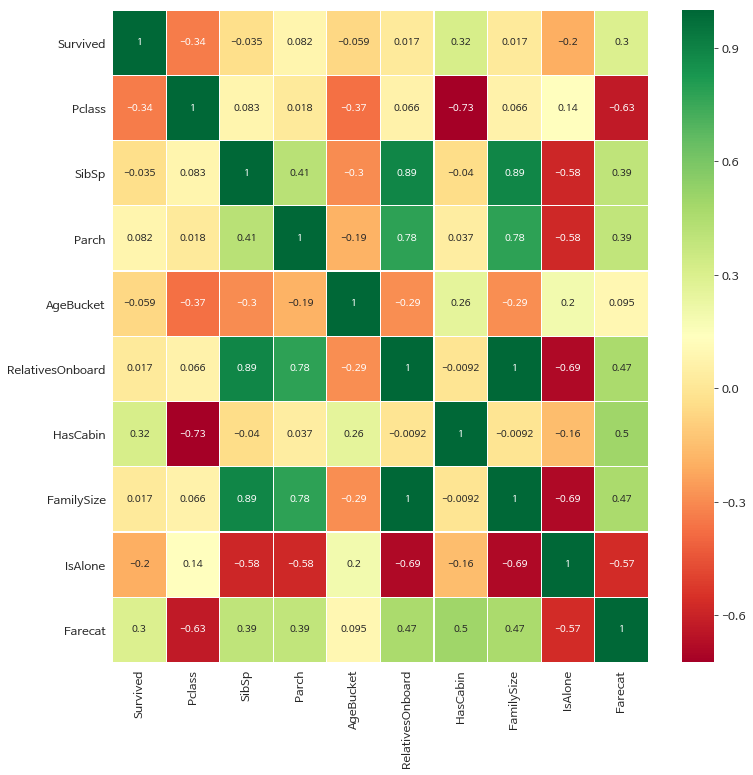

In [134]:
# Lets also solidify our findings using the correlation matrix
corr = train_data.corr()
sns.heatmap(corr, annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

In [135]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

train_data.head(5)

,Survived,Pclass,SibSp,Parch,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Farecat,...,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,1,0,15.0,1,0,2,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,1,0,30.0,1,1,2,0,3,...,0,1,0,0,0,0,0,0,1,0
2,1,3,0,0,15.0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,0,30.0,1,1,2,0,3,...,0,1,0,0,0,0,0,1,0,0
4,0,3,0,0,30.0,0,0,1,1,1,...,1,0,0,0,0,0,0,1,0,0


In [136]:
display(train_data.sample(n = 5))

,Survived,Pclass,SibSp,Parch,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Farecat,...,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
745,0,1,1,1,60.0,2,1,3,0,3,...,0,0,1,0,0,0,0,0,0,1
252,0,1,0,0,60.0,0,1,1,1,2,...,1,0,0,0,0,0,0,0,0,1
641,1,1,0,0,15.0,0,1,1,1,3,...,0,0,0,0,0,0,1,0,0,0
175,0,3,1,1,15.0,2,0,3,0,0,...,1,0,0,0,0,1,0,0,0,0
222,0,3,0,0,45.0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [137]:

# Split into features and target variable
features = train_data.iloc[:, 1:]
target = train_data.iloc[:, 0]

display(features.sample(n = 10))
display(target.sample(n = 10))

,Pclass,SibSp,Parch,AgeBucket,RelativesOnboard,HasCabin,FamilySize,IsAlone,Farecat,Sex_female,...,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
347,3,1,0,NaN,1,0,2,0,2,1,...,0,1,0,0,0,0,0,0,1,0
280,3,0,0,60.0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
593,3,0,2,NaN,2,0,3,0,0,1,...,0,0,0,0,0,0,1,0,0,0
794,3,0,0,15.0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
842,1,0,0,30.0,0,0,1,1,2,1,...,0,0,0,0,0,0,0,1,0,0
890,3,0,0,30.0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
303,2,0,0,NaN,0,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
640,3,0,0,15.0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
200,3,0,0,15.0,0,0,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
435,1,1,2,0.0,3,1,4,0,3,1,...,0,0,0,0,0,1,0,0,0,0


682    0
572    1
394    1
431    1
733    0
498    0
648    0
688    0
337    1
349    0
Name: Survived, dtype: int64

In [138]:
# Create a simple decision tree to see important features

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split = 10)
classifier.fit(features, target)

pd.Series(classifier.feature_importances_, features.columns).sort_values(ascending = True).plot.barh(width = 0.6)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()



ValueError: Input contains NaN, infinity or a value too large for dtype('float32').